In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carga los datos desde un archivo CSV
datos = pd.read_csv('cancer_de_mama_update.csv')


In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           286 non-null    int64
 1   tumor-size    286 non-null    int64
 2   inv-nodes     286 non-null    int64
 3   deg-malig     286 non-null    int64
 4   irradiat      286 non-null    int64
 5   class         286 non-null    int64
 6   menopause     286 non-null    int64
 7   node-caps     286 non-null    int64
 8   breast        286 non-null    int64
 9   breast-quead  286 non-null    int64
dtypes: int64(10)
memory usage: 22.5 KB


# Matriz de confusión

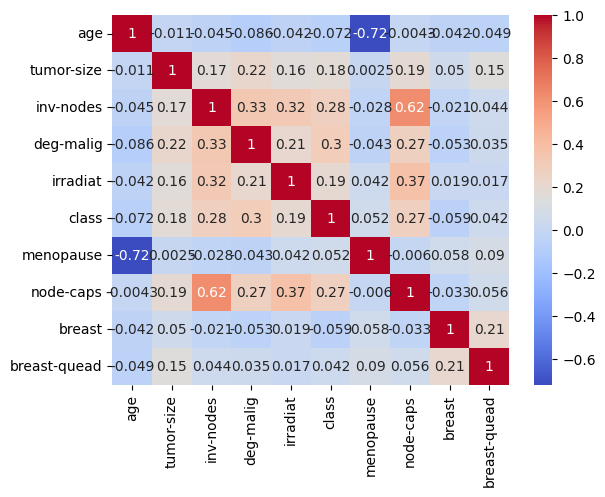

In [3]:
corr = datos.corr()
import seaborn as sns
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

In [4]:

# Separa los datos en características (X) y etiquetas (y)
X = datos.drop('class', axis=1)
y = datos['class']

In [5]:
# Normaliza las características numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Entrenamiento del modelo

In [6]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Entrena un modelo KNN en el conjunto de entrenamiento
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predicción del modelo con los datos de entrenamiento

In [8]:
# Utiliza el modelo para hacer predicciones sobre el conjunto de prueba
predicciones = knn.predict(X_test)


## Score

In [9]:
# Calcula la precisión del modelo en el conjunto de prueba
precision = knn.score(X_test, y_test)
print('Precisión del modelo:', precision)

Precisión del modelo: 0.6206896551724138


# Predicción usando datos de prueba

In [11]:
new_data = pd.DataFrame({
    'age': [1],  # 30-39 años
    'tumor-size': [3],
    'inv-nodes': [0],
    'deg-malig': [3],
    'menopause': [2],
    'node-caps': [1],
    'breast': [0],
    'breast-quad': [3],
    'irradiat': [1]
})

c:\Users\Zacks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Predicción

 no-recurrence-events -> 0 ( No tiene cancer )
 
 recurrence-events    -> 1 ( Si tiene cancer )

In [17]:
# Hacemos una predicción utilizando el modelo
X_new = new_data
y_pred = knn.predict(X_new)
print(y_pred)

[0]


c:\Users\Zacks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
